In [1]:
import pandas as pd
invoice = pd.read_csv('fct_invoice.csv')
customer = pd.read_json('dim_customer.json')

# Easy

## 1

In [2]:
len(customer)

5191

## 2

In [3]:
categs = invoice["category"].unique()

In [4]:
categs

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [5]:
len(categs)

8

## 3

In [6]:
invoice["payment_method"].value_counts().max()

44447

In [7]:
invoice["payment_method"].mode()

0    Cash
Name: payment_method, dtype: object

# Medium

## 1

In [8]:
invoice['total']= invoice['quantity']*invoice['price']
invoice.groupby('category').total.sum().nlargest(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total, dtype: float64

## 2

In [9]:
merged = pd.merge(
    invoice,
    customer,
    how='inner',
    left_on='customer_id',
    right_on='id'
)

In [10]:
merged[merged["age"] > 45]["total"].sum()

82039768.15

## 3

In [11]:
import matplotlib.pyplot as plt

In [12]:
dates = invoice["invoice_date"]
merged["invoice_date"] = pd.to_datetime(dates, format= '%d/%m/%Y')

In [13]:
forplot = merged[['invoice_date', 'total']].groupby('invoice_date').sum()

<Axes: xlabel='invoice_date'>

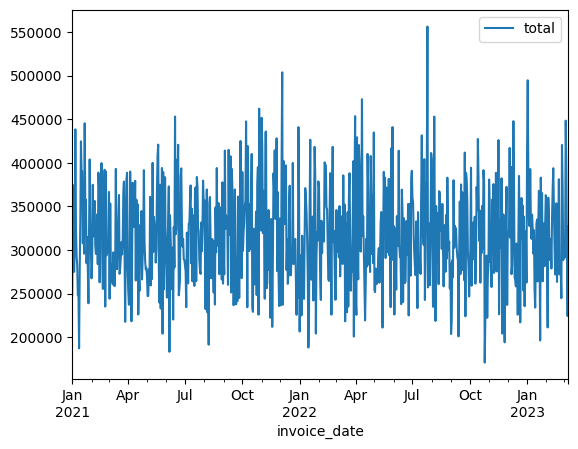

In [14]:
forplot.plot()

# Hard

In [15]:
merged['total']= invoice['quantity']*invoice['price']

In [16]:
age_bins = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '99+']

# Add Age Range column using pd.cut()
merged['age_range'] = pd.cut(merged['age'], bins=age_bins, labels=age_labels)

In [17]:
pivot_table = pd.pivot_table(merged, values='total', index=['category', 'age_range'], aggfunc='sum')

In [18]:
pivot_table

                         total
category age_range            
Books    10-19       161949.11
         20-29      1274631.19
         30-39      1208995.72
         40-49      1291224.13
         50-59      1104812.99
...                        ...
Toys     50-59      2166764.34
         60-69      2397438.17
         70-79      1772930.66
         80-89       962723.06
         99+              0.00

[72 rows x 1 columns]
